# Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data
In this example we are going to use a dataset with one feature *x* and target *y* that we need to predict.

In [3]:
data = [
    (6, 6),
    (0, 3),
    (4, 5),
    (-1, -3),
    (2, 0),
    (6, 7),
    (4, 4),
    (-4, -1),
    (-3, 5),
    (2, 0)
]
data = pd.DataFrame(data, columns=['x', 'y'])
data

,x,y
0,6,6
1,0,3
2,4,5
3,-1,-3
4,2,0
5,6,7
6,4,4
7,-4,-1
8,-3,5
9,2,0


Let us visualise the dataset:

<AxesSubplot:xlabel='x', ylabel='y'>

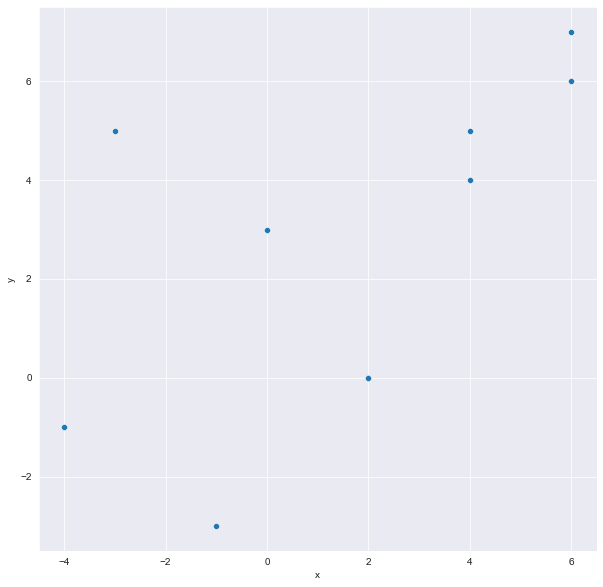

In [4]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x='x', y='y')

# Gradient Descent
We will implement the batch gradient descent. For the loss function we are going to use MSE.

In [5]:
def mse(y_true: pd.Series, y_pred: pd.Series) -> float:
    return ((y_true - y_pred) ** 2).sum() / len(y_pred)

In the cell below we declare parameters of the algorithm.
* *Iterations* specify how many times we are going to update weights. In most cases, the higher the number of iterations is, the more precisely the algorithm converges.
* *Learning rate* (usually denoted as *alpha*) influences the scale of each update. Usually, with lower values of alpha the algorithm converges more precisely but it takes more time for training. However, by choosing a very large value for rate the algorithm can highly jump over the local minima. As a result, the algorithm will not converge correctly.
* *Batch size* allows to use several objects on each iteration for weights update. If we choose batch size to be equal to 1, then gradient descent is called stochastic.
* *w* and *b* are initial values of weights. There exist several strategies of their initialization. In our example we are going to assign small random values to them.

In [6]:
iterations = 1000
batch_size = 5
alpha = 0.001
w, b = np.random.rand(2)

In [7]:
# this dictionary will be used for tracking parameters of each iteration
history = {
    'iteration': [],
    'w': [],
    'b': [],
    'loss': []
}

In [8]:
for iteration in range(iterations):

    # choosing object in batch
    batch_indices = np.random.randint(0, len(data), batch_size)
    batch_data = data.loc[batch_indices]

    x, y, n = batch_data['x'], batch_data['y'], len(batch_data)
    y_hat = w * batch_data['x'] + b # prediction

    # weights update
    w -= alpha * 2 / n * (x * (y_hat - y)).sum()
    b -= alpha * 2 / n * (y_hat - y).sum()

    loss = mse(data['y'], w * data['x'] + b) # total loss

    # saving parameters on current iteration
    history['iteration'].append(iteration)
    history['w'].append(w)
    history['b'].append(b)
    history['loss'].append(loss)

# Analysis of parameters
Let us draw several plots of parameters that we tracked throughout the training process.

Text(0.5, 1.0, 'Weights on each iteration')

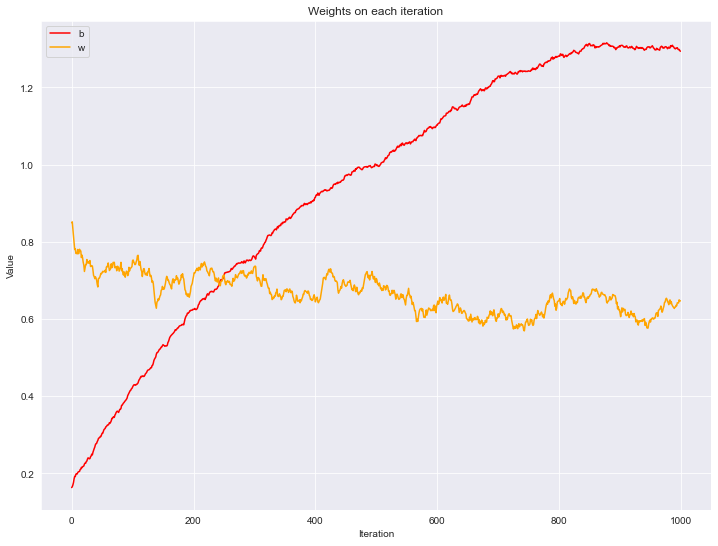

In [9]:
plt.figure(figsize=(12, 9))
sns.lineplot(x=history['iteration'], y=history['b'], color='red', label='b')
sns.lineplot(x=history['iteration'], y=history['w'], color='orange', label='w')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Weights on each iteration')

Text(0.5, 1.0, 'Loss value on each iteration')

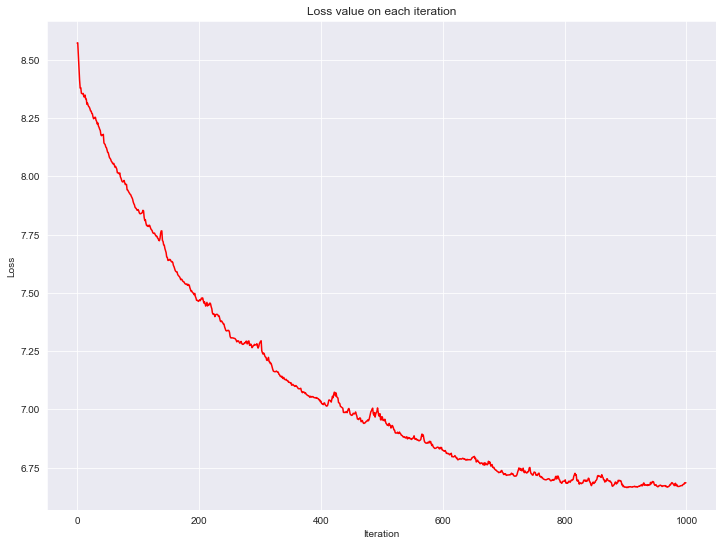

In [10]:
plt.figure(figsize=(12, 9))
sns.lineplot(x=history['iteration'], y=history['loss'], color='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Loss value on each iteration')

During training process the loss value should normally decrease with each iteration.

In [11]:
print(f'Linear regression equation: y = {w:.3f} * x + {b:.3f}')
print(f'Total loss: {loss:.3f}')

Linear regression equation: y = 0.647 * x + 1.293
Total loss: 6.685


# Regression line
Since we have trained a model on dataset with only one feature, it is easy to visualise the results in form of a regression line on 2D-plane. If we had more than 2 features, then it would have been problematic.

The closer the line fits to all of the points, the better our model is.

In [12]:
regression_line = pd.DataFrame(
    data=[(x, w * x + b) for x in np.linspace(data.min().min(), data.max().max(), 500)],
    columns=['x', 'y']
)

Text(0.5, 1.0, 'Fitting line of linear regression')

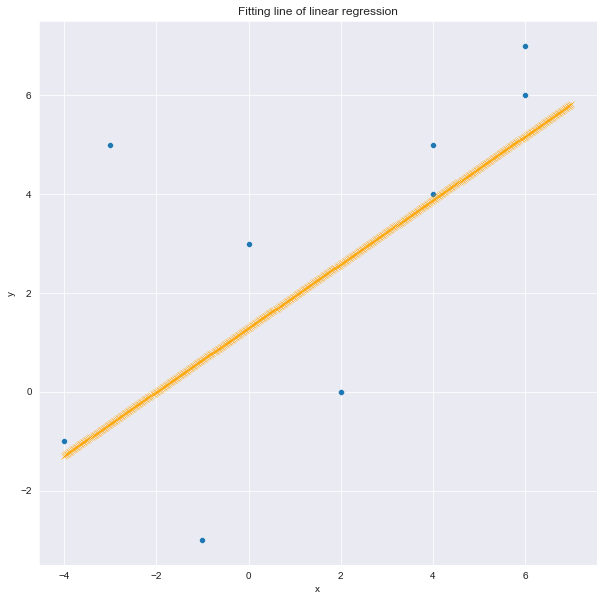

In [13]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=data, x='x', y='y')
sns.scatterplot(data=regression_line, x='x', y='y', marker='x', color='orange')
plt.title('Fitting line of linear regression')